In [ ]:
from pathlib import Path
import sys, importlib.util, os
parentPath = Path.cwd().parent
sys.path.insert(0, str(parentPath))  

%load_ext autoreload
%autoreload 2

import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from utils.encoding import compute_directional_threat, Ship, Asteroid, map_threat_to_stim_freqs
from utils.visualize import visualize_game, plot_directional_stim
from utils.stimulation import StimConfig, generate_directional_trains


Threats: Threat(left=0.49, center=0.0, right=0.37)


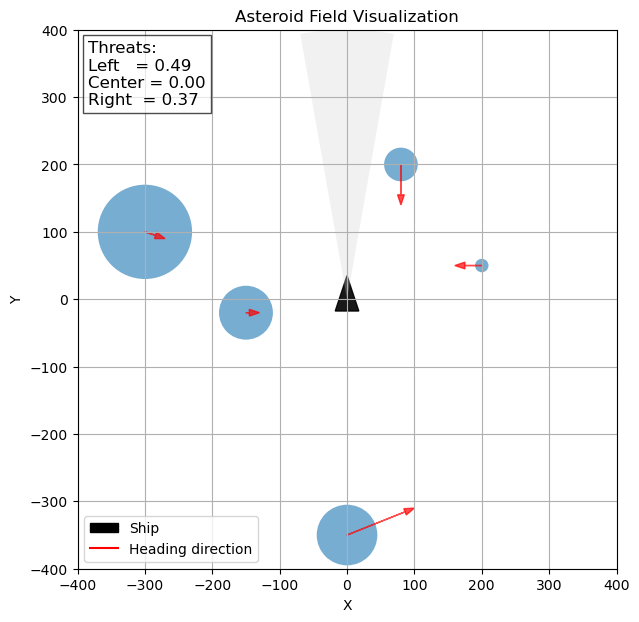

In [124]:
ship = Ship(x=0, y=0, vx=0, vy=0, heading=math.radians(90))

asteroids = [
    Asteroid(x=200, y=50, vx=-20, vy=0, size=10),
    Asteroid(x=-150, y=-20, vx=10, vy=0, size=40),
    Asteroid(x=80, y=200, vx=0, vy=-30, size=25),
    Asteroid(x=-300, y=100, vx=15, vy=-5, size=70),
    Asteroid(x=0, y=-350, vx=50, vy=20, size=45),
]

d_threat = compute_directional_threat(ship, asteroids, max_dist=400, max_size=50, theta_center_deg = 10)

print("Threats:", d_threat)

visualize_game(ship, asteroids, d_threat=d_threat, theta_center_deg = 10)

Threat: Threat(left=0.49, center=0.0, right=0.37)
Stimulation Frequencies (Hz): StimFreqs(left_hz=27, center_hz=5, right_hz=22)


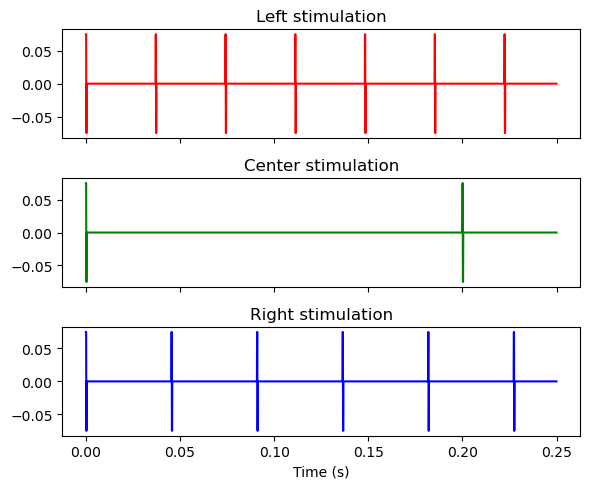

In [152]:
# Threat to stimulation frequencies
stim_freqs = map_threat_to_stim_freqs(d_threat)
print("Threat:", d_threat)
print("Stimulation Frequencies (Hz):", stim_freqs)
# Stimulation configuration
cfg = StimConfig(
    sampling_rate=20_000,
    pulse_amplitude=0.075,   # 75 mV
    phase_width_s=200e-6,
    inter_phase_gap_s=0.0,
)
duration_s = 0.25
# Generate stimulation trains
stim_trains = generate_directional_trains(stim_freqs, duration_s, cfg)
plot_directional_stim(stim_trains, cfg)

In [163]:
from utils.spikes_simulate import simulate_spike_trains, bin_spike_trains, RandomRateRanges
from utils.decoding import NeuralDecoder, Action

# 1 second simulated
duration_s = 0.1 # 0.1 sec simulation
dt = 0.010  # 10 ms bins
trains = simulate_spike_trains(duration_s, RandomRateRanges())
bins = bin_spike_trains(trains, bin_size_s=dt)
# Decode actions from binned spike counts
decoder = NeuralDecoder()

t = 0.0
for bc in bins:
    t += dt
    print(f"Time: {t:.3f} s, Firing counts: {bc}")
    action = decoder.step(bc, t)
    print(action)

Time: 0.010 s, Firing counts: FiringCounts(left=0, right=0, thrust=1, shoot=0)
Action(heading=<Heading.NONE: 'none'>, thrust_on=True, shoot=False)
Time: 0.020 s, Firing counts: FiringCounts(left=0, right=2, thrust=0, shoot=1)
Action(heading=<Heading.RIGHT: 'right'>, thrust_on=False, shoot=True)
Time: 0.030 s, Firing counts: FiringCounts(left=0, right=0, thrust=0, shoot=2)
Action(heading=<Heading.NONE: 'none'>, thrust_on=False, shoot=False)
Time: 0.040 s, Firing counts: FiringCounts(left=0, right=1, thrust=0, shoot=0)
Action(heading=<Heading.RIGHT: 'right'>, thrust_on=False, shoot=False)
Time: 0.050 s, Firing counts: FiringCounts(left=0, right=0, thrust=0, shoot=1)
Action(heading=<Heading.NONE: 'none'>, thrust_on=False, shoot=False)
Time: 0.060 s, Firing counts: FiringCounts(left=0, right=0, thrust=0, shoot=0)
Action(heading=<Heading.NONE: 'none'>, thrust_on=False, shoot=False)
Time: 0.070 s, Firing counts: FiringCounts(left=0, right=0, thrust=0, shoot=0)
Action(heading=<Heading.NONE: '